In [3]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [28]:
from PIL import Image
import os, os.path
lista=["dogs","cats"]
imgs=[]
for i in lista: 
    path = f"/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/cats_and_dogs/train/{i}"
    valid_images = [".jpg",".gif",".png",".tga"]
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        imgs.append(Image.open(os.path.join(path,f)))
        

In [29]:
imagenes=[]
for i in imgs:
    img = np.asarray(i)
    width = 100
    height = 100
    dim = (width, height)
    reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    grises = cv2.cvtColor(reduccion, cv2.COLOR_RGB2GRAY)
    imagenes.append(grises)   

In [30]:
imagenes_train=np.array(imagenes)
imagenes_train.shape

(2000, 100, 100)

In [31]:
from PIL import Image
import os, os.path
lista=["dogs","cats"]
imgs2=[]
for i in lista: 
    path = f"/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/cats_and_dogs/test/{i}"
    print(path)
    valid_images = [".jpg",".gif",".png",".tga"]
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        imgs2.append(Image.open(os.path.join(path,f)))

/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/cats_and_dogs/test/dogs
/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/cats_and_dogs/test/cats


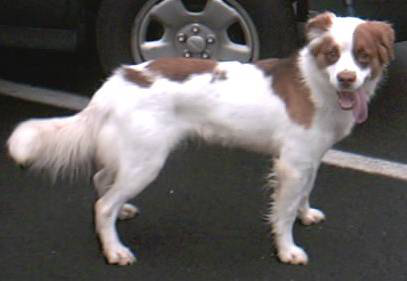

In [17]:
imgs2[0]

In [32]:
imagenes2=[]
for i in imgs2:
    img = np.asarray(i)
    width = 100
    height = 100
    dim = (width, height)
    reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    grises = cv2.cvtColor(reduccion, cv2.COLOR_RGB2GRAY)
    imagenes2.append(grises) 

In [33]:
imagenes_test=np.array(imagenes2)
imagenes_test.shape

(1000, 100, 100)

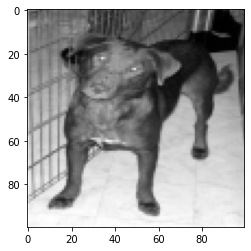

In [34]:
plt.imshow(imagenes_train[1],cmap="binary_r")

In [35]:
len(imagenes_train)

2000

In [37]:
len(imagenes_test)

1000

In [40]:
train_labels=[]
for i in range (2000):
    if i<=1000:
        train_labels.append(0)
    else:
        train_labels.append(1)

train_labels2=np.array(train_labels)

test_labels=[]
for i in range (1000):
    if i<=500:
        test_labels.append(0)
    else:
        test_labels.append(1)

test_labels2=np.array(test_labels)

In [42]:
imagenes_train = imagenes_train / 255.0

imagenes_test = imagenes_test / 255.0

imagenes_train2=np.array(imagenes_train)
imagenes_test2=np.array(imagenes_test)

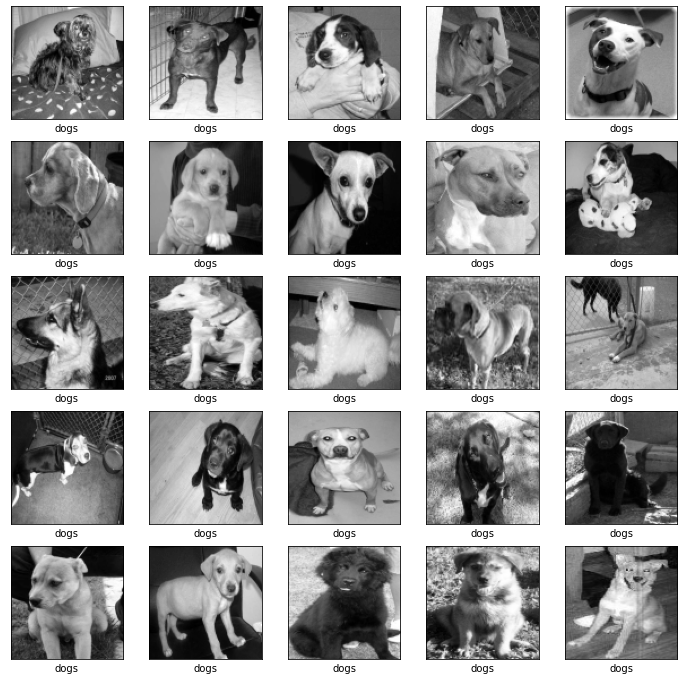

In [44]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagenes_train2[i], cmap="binary_r")
    plt.xlabel(lista[train_labels2[i]])
plt.show()

In [46]:
imagenes_train2[0].shape

(100, 100)

In [52]:
imagenes_train2=imagenes_train2.reshape(2000,100,100,1)
imagenes_test2=imagenes_test2.reshape(1000,100,100,1)

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100,100,1))) #la capa de convolución siempre lleva relu
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))#2--->CLASES Q TENGO!!!!!!!!!!!!!!!!!!!!!!!!!!!!
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
average_pooling2d_2 (Average (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               4646700   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [57]:
# Elegimos hiperparametros 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(imagenes_train2, train_labels2, epochs=15, verbose=1)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 27s 428ms/step - loss: 0.7055 - accuracy: 0.4885
Epoch 2/15
63/63 [==============================] - 26s 420ms/step - loss: 0.6926 - accuracy: 0.5155
Epoch 3/15
63/63 [==============================] - 28s 448ms/step - loss: 0.6904 - accuracy: 0.5590
Epoch 4/15
63/63 [==============================] - 27s 435ms/step - loss: 0.6787 - a

In [59]:
test_loss, test_acc = model.evaluate(imagenes_test2,  test_labels2)

print('\nTest accuracy:', test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 4s 113ms/step - loss: 0.9938 - accuracy: 0.6040

Test accuracy: 0.6039999723434448


In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.rainbow):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [67]:
len(imagenes_test2)

1000

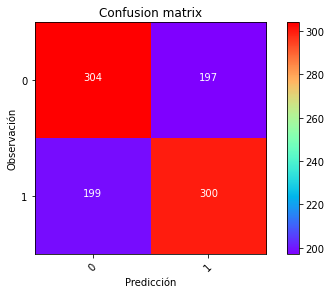

In [68]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools


Y_pred = model.predict(imagenes_test2)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true =test_labels#= np.argmax(test_labels, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(2))